1. Generate sinusoidal data with t = 0 to t = 1000 for the function f(x) = sin(2t+3). Add a random uniform noise to f(x), and build a time series prediction model with RNN and LSTM for input of 20 past time steps and prediction of 1 step in future. Using an appropriate evaluation metric, compare two models. 

1.1 Generate sinusoidal data with t = 0 to t = 1000 for the function f(x) = sin(2t+3). Add a random uniform noise to f(x)

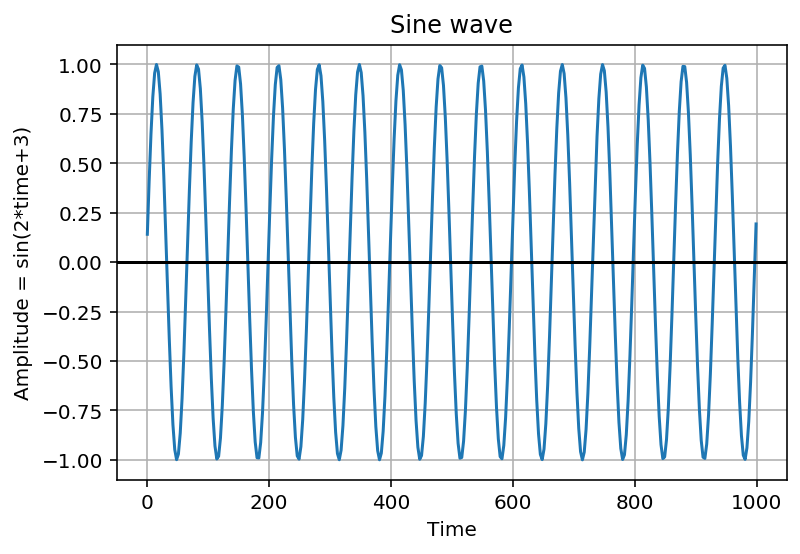

In [97]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inLine
%config InlineBackend.figure_format='retina'
# Get x values of the sine wave
time= np.arange(0,1000,3);

# Amplitude of the sine wave is sine of a variable like time
amplitude   = np.sin(2*time+3)

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.plot(time, amplitude)

# Give a title for the sine wave plot
plt.title('Sine wave')

# Give x axis label for the sine wave plot
plt.xlabel('Time')

# Give y axis label for the sine wave plot
plt.ylabel('Amplitude = sin(2*time+3)')
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.show()

# Display the sine wave
plt.show()


1.2 build a time series prediction model with RNN and LSTM for input of 20 past time steps

In [98]:
#Let’s start with the library imports and setting seeds:
import pandas as pd

In [99]:
#Data Preparation
df=pd.DataFrame(dict(sine=amplitude),index=time,columns=['sine'])
train_size = int(len(df) * 0.8)
test_size = len(df) - train_size
train, test = df.iloc[0:train_size], df.iloc[train_size:len(df)]
print(len(train), len(test))

267 67


Preparing the data for Time Series forecasting (LSTMs in particular) can be tricky. Intuitively, we need to predict the value at the current time step by using the history ( n time steps from it). Here’s a generic function that does the job:

In [100]:
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X.iloc[i:(i + time_steps)].values
        Xs.append(v)
        ys.append(y.iloc[i + time_steps])
    return np.array(Xs), np.array(ys)

The beauty of this function is that it works with univariate (single feature) and multivariate (multiple features) Time Series data. Let’s use a history of 20 time steps to make our sequences

In [101]:
time_steps = 20

# reshape to [samples, time_steps, n_features]

X_train, y_train = create_dataset(train, train.sine, time_steps)
X_test, y_test = create_dataset(test, test.sine, time_steps)

print(X_train.shape, y_train.shape)

(247, 20, 1) (247,)


# Modelling

We have our sequences in the shape (samples, time_steps, features)

Training an LSTM model in Keras is easy.

In [102]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.LSTM(128, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(keras.layers.Dense(1))
model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))

# Training

The most important thing to remember when training Time Series models is to not shuffle the data (the order of the data matters). The rest is pretty standard

In [103]:
history = model.fit(
    X_train, y_train,
    epochs=30,
    batch_size=16,
    validation_split=0.1,
    verbose=1,
    shuffle=False
)

Train on 222 samples, validate on 25 samples
Epoch 1/30
222/222 [==============================] - 2s 7ms/sample - loss: 0.2616 - val_loss: 0.0147
Epoch 2/30
222/222 [==============================] - 0s 1ms/sample - loss: 0.0234 - val_loss: 0.0147
Epoch 3/30
222/222 [==============================] - 0s 1ms/sample - loss: 0.0071 - val_loss: 0.0041
Epoch 4/30
222/222 [==============================] - 0s 993us/sample - loss: 0.0017 - val_loss: 0.0011
Epoch 5/30
222/222 [==============================] - 0s 992us/sample - loss: 3.8694e-04 - val_loss: 1.3435e-04
Epoch 6/30
222/222 [==============================] - 0s 1ms/sample - loss: 7.8817e-05 - val_loss: 1.3094e-05
Epoch 7/30
222/222 [==============================] - 0s 1ms/sample - loss: 2.3744e-05 - val_loss: 2.0973e-05
Epoch 8/30
222/222 [==============================] - 0s 1ms/sample - loss: 1.4250e-05 - val_loss: 1.0218e-05
Epoch 9/30
222/222 [==============================] - 0s 992us/sample - loss: 9.0778e-06 - val_loss: 8.

Our dataset is pretty simple and contains the randomness from our sampling. After about 15 epochs, the model is pretty much-done learning.

# Evaluation

Let's take out some predicition from our Model

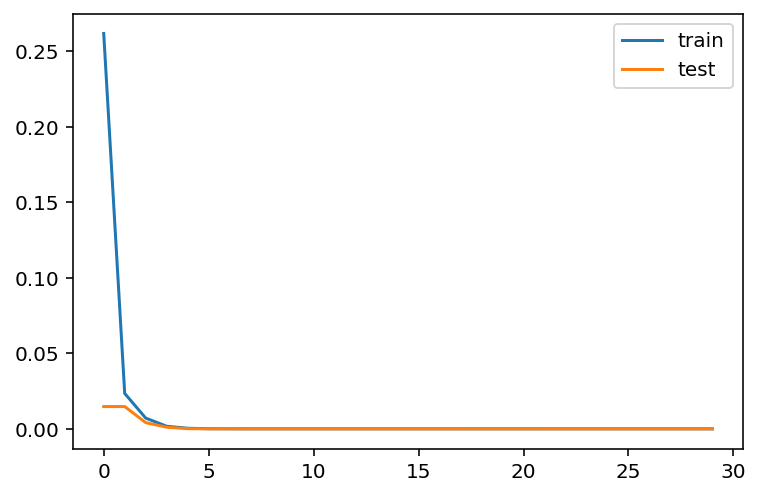

In [104]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend();

In [105]:
y_pred = model.predict(X_test)

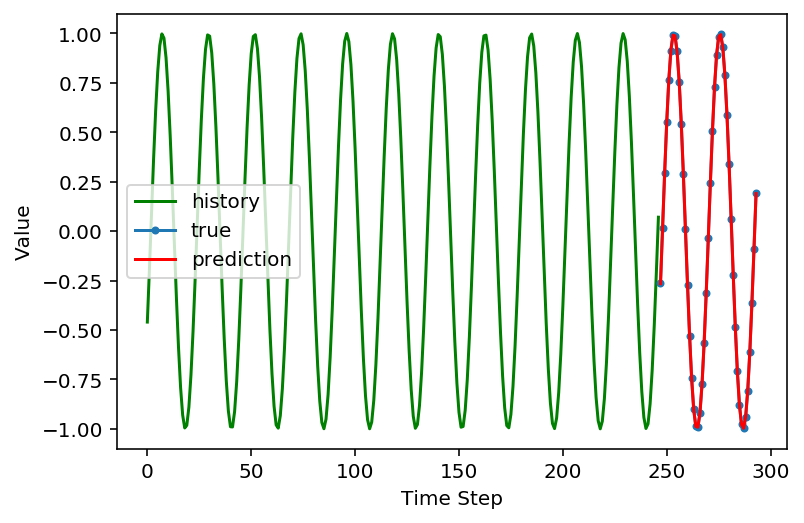

In [106]:
plt.plot(np.arange(0, len(y_train)), y_train, 'g', label="history")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_test, marker='.', label="true")
plt.plot(np.arange(len(y_train), len(y_train) + len(y_test)), y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

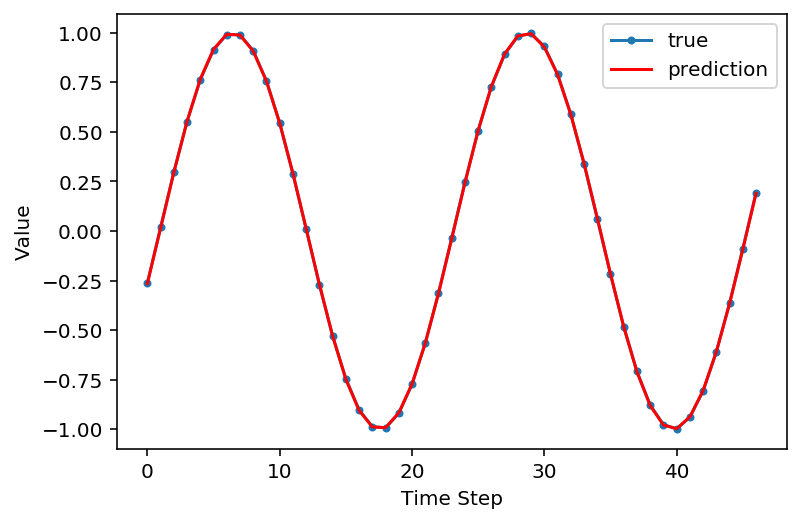

In [107]:
plt.plot(y_test, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show();

3. Write a program to generate all prime numbers between 0 and N. Pick a random prime number among these prime numbers. Let that be R. Imagine a regular polygon of side R. Calculate the angle made by two lines from center of the polygon which meet two end points of a same side of that polygon.  

3.1 Write a program to generate all prime numbers between 0 and N.Pick a random prime number among these prime numbers. Let that be R

In [131]:
import sympy
R=sympy.randprime(0,20)
R

19

Imagine a regular polygon of side R. Calculate the angle made by two lines from center of the polygon which meet two end points of a same side of that polygon.

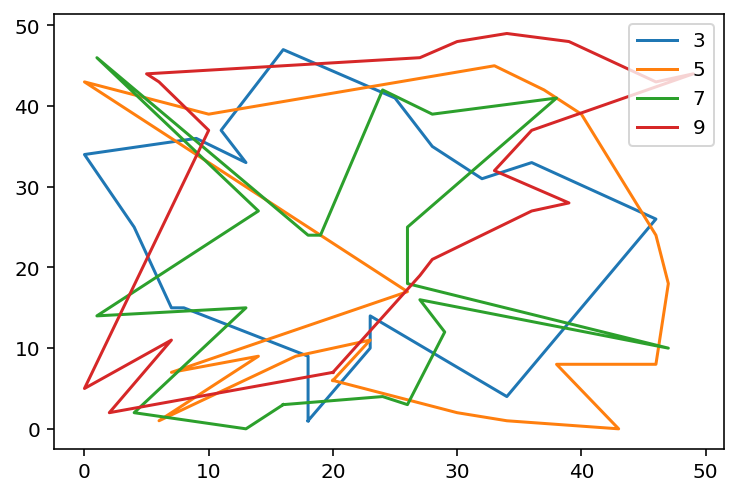

In [196]:
import numpy as np
from matplotlib import pyplot as plt

def draw_polygon(ax, R):

    x = np.random.randint(0,50,R)
    y = np.random.randint(0,50,R)

    ##computing the (or a) 'center point' of the polygon
    center_point = [np.sum(x)/R, np.sum(y)/R]

    angles = np.arctan2(x-center_point[0],y-center_point[1])

    ##sorting the points:
    sort_tups = sorted([(i,j,k) for i,j,k in zip(x,y,angles)], key = lambda t: t[2])

    ##making sure that there are no duplicates:
    if len(sort_tups) != len(set(sort_tups)):
        raise Exception('two equal coordinates -- exiting')

    x,y,angles = zip(*sort_tups)
    x = list(x)
    y = list(y)

    ##appending first coordinate values to lists:
    x.append(x[0])
    y.append(y[0])

    ax.plot(x,y, label = '{}'.format(n))

if __name__ == '__main__':

    fig,ax = plt.subplots()

    for n in range(3,11,2):
        draw_polygon(ax,R)
    ax.legend()
    plt.show()


4. Get the data from Forest Fires url - https://archive.ics.uci.edu/ml/datasets/Forest+Fires  Do a preliminary data exploration analysis and find out the suitable cluster with suitable explanation for that cluster.

In [197]:
forestfires = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/forest-fires/forestfires.csv')

In [199]:
# "Abstract: This is a difficult regression task, where the aim is to predict the burned area of forest fires, in the northeast region of Portugal, by using meteorological and other data (see details at: [Web Link])."
# "For more information, read [Cortez and Morais, 2007].
# 1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
# 2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
# 3. month - month of the year: 'jan' to 'dec'
# 4. day - day of the week: 'mon' to 'sun'
# 5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
# 6. DMC - DMC index from the FWI system: 1.1 to 291.3
# 7. DC - DC index from the FWI system: 7.9 to 860.6
# 8. ISI - ISI index from the FWI system: 0.0 to 56.10
# 9. temp - temperature in Celsius degrees: 2.2 to 33.30
# 10. RH - relative humidity in %: 15.0 to 100
# 11. wind - wind speed in km/h: 0.40 to 9.40
# 12. rain - outside rain in mm/m2 : 0.0 to 6.4
# 13. area - the burned area of the forest (in ha): 0.00 to 1090.84
# (this output variable is very skewed towards 0.0, thus it may make
# sense to model with the logarithm transform)."

In [198]:
forestfires.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


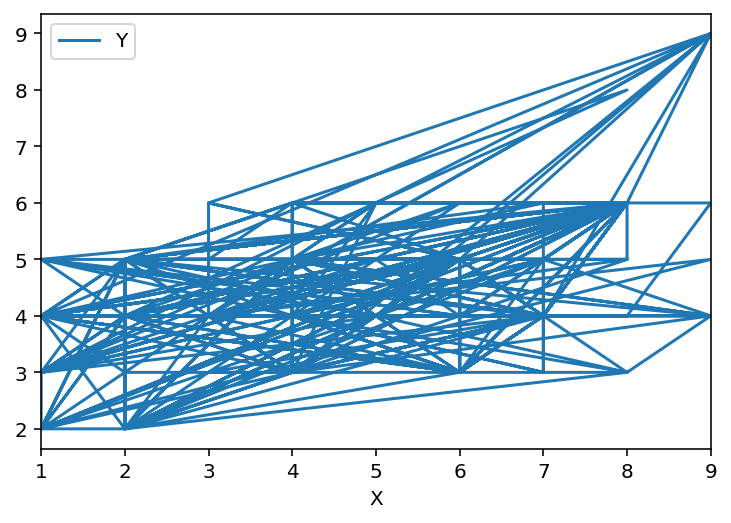

In [200]:
forestfires.plot('X','Y')

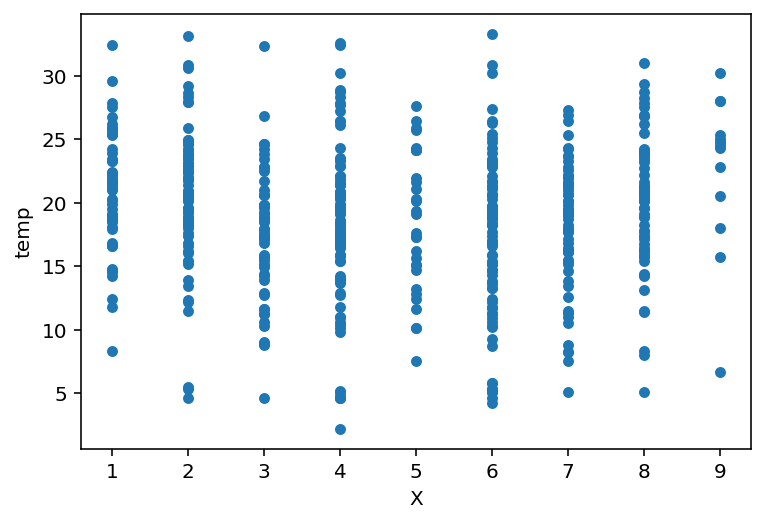

In [201]:
forestfires.plot.scatter('X','temp');plt.show()

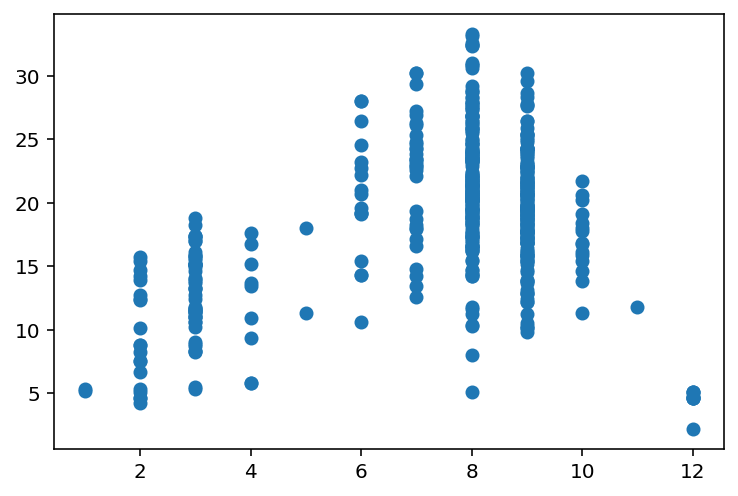

In [203]:
month_to_num={'jan':1,'feb':2,'mar':3,'apr':4,'may':5,'jun':6,'jul':7,'aug':8,'sep':9,'oct':10,'nov':11,'dec':12}
months=[month_to_num[month] for month in forestfires['month']]
plt.scatter(months,forestfires['temp'])

In [204]:
pwd()

'/Users/somesh/Documents/Somesh/Aptive Globe'